In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [ ]:
# Завантажуємо датасет
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Стандартизуємо дані для кращої кластеризації
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
# Виводимо перші 5 рядків даних
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
# Метод ліктя
wcss = []  # Within-Cluster Sum of Squares (внутрішньокластерна сума квадратів)

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


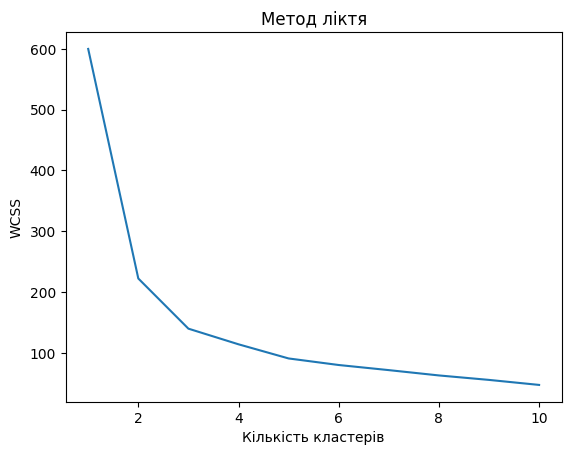

In [ ]:
# Візуалізація методу ліктя
plt.plot(range(1, 11), wcss)
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Метод силуетів
silhouette_avg = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df_scaled, cluster_labels))

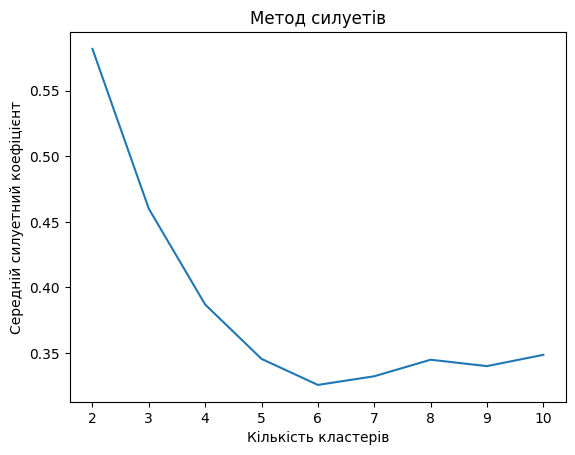

In [ ]:
# Візуалізація методу силуетів
plt.plot(range(2, 11), silhouette_avg)
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній силуетний коефіцієнт')
plt.show()

In [ ]:

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_scaled)


In [ ]:
# Додаємо стовпець кластерів до DataFrame
df['Cluster'] = clusters


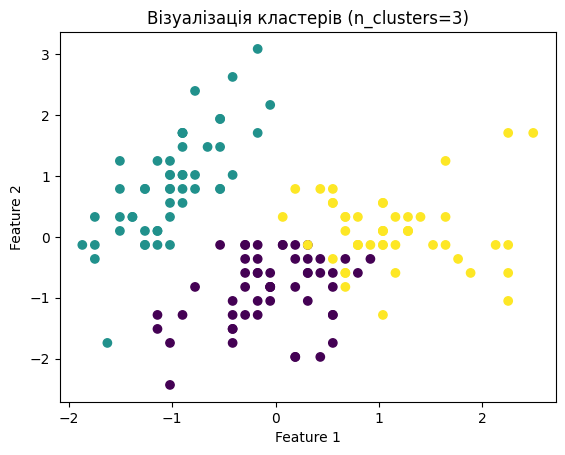

In [ ]:
# Візуалізуємо кластери за першими двома ознаками
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters, cmap='viridis')
plt.title(f'Візуалізація кластерів (n_clusters={optimal_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()